# Project Case Scenario
Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

## Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [3]:
import pandas as pd
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df=boston_df.iloc[:,1:]

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 4: Generate Descriptive Statistics and Visualizations

Generate the following and explain your findings:-

For the "Median value of owner-occupied homes" provide a boxplt-


Provide a  bar plot for the Charles river vaab- le

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and ol- der)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relatio- nship?

Create a histogram for the pupil to teacher ratio variable

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

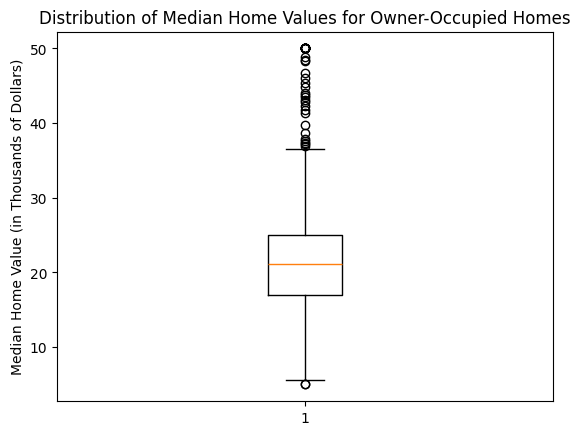

In [8]:
plt.boxplot(boston_df['MEDV'],)
# Personalizar el boxplot 
plt.title('Distribution of Median Home Values for Owner-Occupied Homes')
plt.ylabel('Median Home Value (in Thousands of Dollars)')
plt.show()

In the boxplot analysis of MEDV, it appears that there are some outliers with values exceeding 40. These data points stand out as potential anomalies or extreme values in the distribution of median home values, and may warrant further investigation.

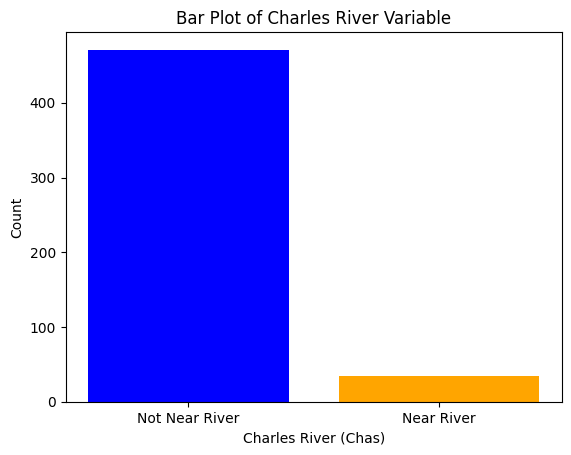

Index([0.0, 1.0], dtype='float64', name='CHAS')

In [40]:
# Count the occurrences of each unique value in 'Chas'
chas_counts = boston_df['CHAS'].value_counts()

# Create a bar plot
plt.bar(chas_counts.index, chas_counts.values, color=['blue', 'orange'])

# Customize the bar plot (optional)
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (Chas)')
plt.ylabel('Count')
plt.xticks(chas_counts.index, labels=['Not Near River', 'Near River'])
plt.show()
chas_counts.index


The barplot of the Charles River suggests that a significant proportion of the dataset corresponds to areas located away from the Charles River. 

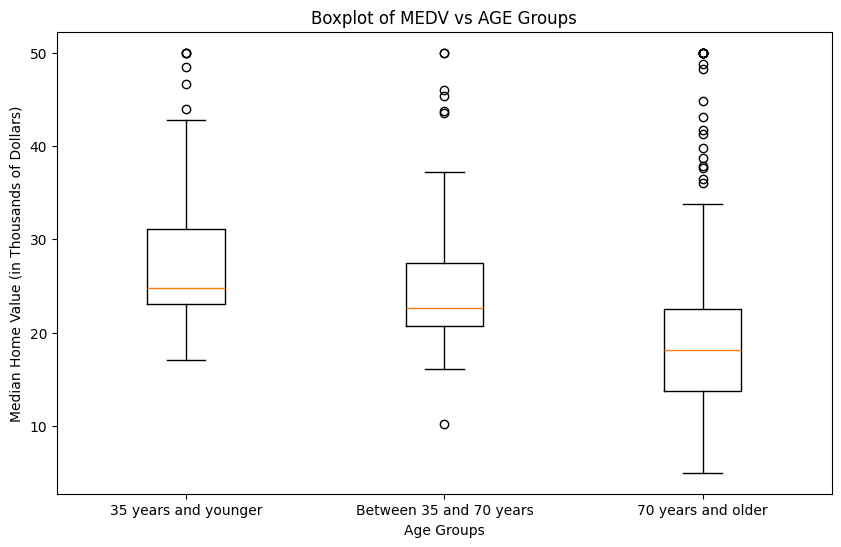

In [39]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([boston_df[boston_df['AGE_Group'] == label]['MEDV'] for label in labels], labels=labels)

# Customize the boxplot (optional)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Home Value (in Thousands of Dollars)')
plt.show()

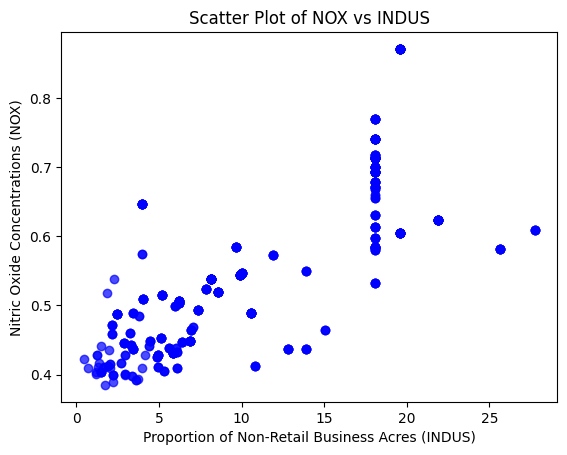

In [40]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue', alpha=0.7)

# Customize the scatter plot (optional)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')

# Show the plot
plt.show()

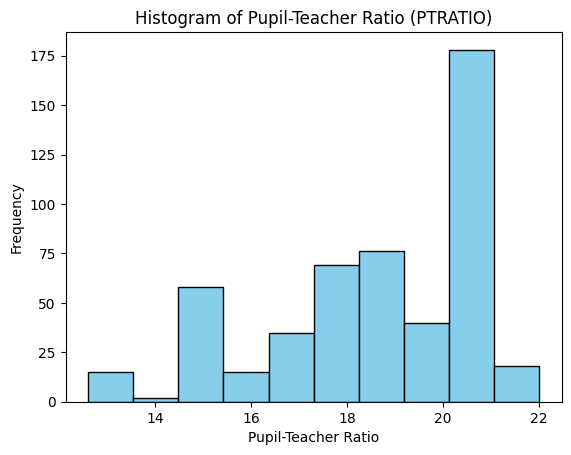

In [41]:
plt.hist(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')

# Customize the histogram (optional)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [37]:
frequencies = boston_df['PTRATIO'].value_counts().reset_index().rename(columns={'count': 'Count'})


total_values = sum(frequencies['Count'])
frequencies['Percentage'] = (frequencies['Count'] / total_values) * 100

frequencies

,PTRATIO,Count,Percentage
0,20.2,140,27.667984
1,14.7,34,6.719368
2,21.0,27,5.335968
3,17.8,23,4.545455
4,19.2,19,3.754941
5,17.4,18,3.557312
6,18.6,17,3.359684
7,19.1,17,3.359684
8,18.4,16,3.162055
9,16.6,16,3.162055


The mode appears to be around 20.2, being the value with the highest frequency (140 observations). This suggests that a pupil-teacher ratio of 20.2 is prevalent in the dataset. Several values have low frequencies, indicating that the 'PTRATIO' variable is not uniformly distributed, and certain values are more common than others.

# Task 5: Use the appropriate tests to answer the questions provided.

## For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Is there a significant difference in median value of houses bounded by the Charles river or not? 

To test whether there is a significant difference in the median value of houses bounded by the Charles River or not, we can use a t-test for independent samples. 

- Null Hypothesis $\left(H_0\right)$ : There is no significant difference in median values of houses bounded by the Charles River and those not bounded by the river $\left(\mu_1=\mu_2\right)$.
- Alternative Hypothesis $\left(H_a\right)$ : There is a significant difference in median values $\left(\mu_1 \neq \mu_2\right)$.

Conduct t-test:

In [43]:
from scipy.stats import ttest_ind


chas_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = ttest_ind(chas_bounded, chas_not_bounded)

# Check the p-value
print('p-value:', p_value)




p-value: 7.390623170519905e-05


With a p-value of 7.39e-05, which is much smaller than a typical significance level of 0.05, we have strong evidence to reject the null hypothesis. This suggests that there is a significant difference in median values of houses between areas bounded and not bounded by the Charles River. The result implies that the Charles River variable is associated with a significant difference in the median values of houses.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

To test whether there is a difference in median values of houses (MEDV) for different proportions of owner-occupied units built prior to 1940 (AGE),  we use an Analysis of Variance (ANOVA) test. ANOVA is suitable for comparing means across multiple groups.

- Null Hypothesis $\left(H_0\right)$ : There is no significant difference in median values of houses across different proportions of owner-occupied units built prior to $1940\left(\mu_1=\mu_2=\ldots=\mu_k\right.$ ).
- Alternative Hypothesis $\left(H_a\right)$ : There is a significant difference in median values across groups.

In [45]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV'],
                            boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV'],
                            boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV'])

# Check the p-value
print('p-value:', p_value)


p-value: 1.7105011022702984e-15


The very small p-value suggests that we have sufficient evidence to reject the null hypothesis, indicating that there is a significant difference in median values of houses across the various proportions of owner-occupied units built before 1940. In other words, the variable 'AGE' appears to be associated with a significant difference in the median values of houses.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

To determine whether there is a relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS), we can use the Pearson correlation coefficient. The Pearson correlation measures the linear relationship between two continuous variables.

In [46]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Check the correlation coefficient and p-value
print('Pearson Correlation Coefficient:', correlation_coefficient)
print('p-value:', p_value)

Pearson Correlation Coefficient: 0.7636514469209158
p-value: 7.91336106123623e-98


With a Pearson Correlation Coefficient of 0.76 and an extremely small p-value of 7.91e-98, we have strong evidence against the null hypothesis that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


Intercept (beta_0): 18.390088330493388
Coefficient for DIS (beta_1): 1.0916130158411088


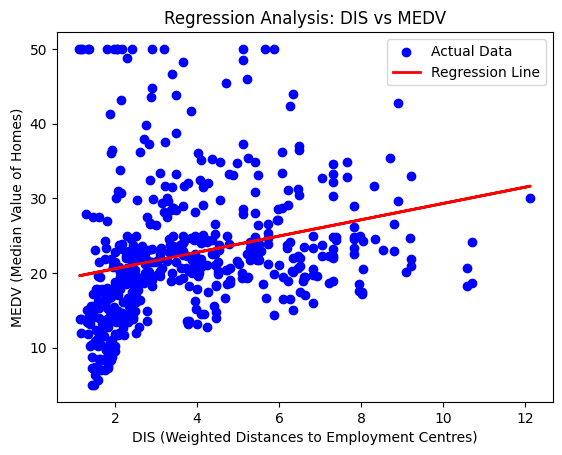

In [48]:
from sklearn.linear_model import LinearRegression

# Prepare the data for regression analysis
X = boston_df[['DIS']]  # Independent variable
y = boston_df['MEDV']     # Dependent variable

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Obtain coefficients
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Print coefficients
print('Intercept (beta_0):', beta_0)
print('Coefficient for DIS (beta_1):', beta_1)

# Plot the regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.title('Regression Analysis: DIS vs MEDV')
plt.xlabel('DIS (Weighted Distances to Employment Centres)')
plt.ylabel('MEDV (Median Value of Homes)')
plt.legend()
plt.show()